In [66]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
!pip install pmdarima
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.arima.model import ARIMA

In [98]:
from statsmodels.tsa.stattools import arma_order_select_ic
from sklearn.metrics import mean_squared_error
from math import sqrt

In [233]:
# I manually copy paste to a new excel file for chap6
# I finally decided to only analyze TMUS data
abspath = "C:/Users/HHGiang/Documents/KEIO/3FZ/"
data = pd.read_excel(abspath + 'Giang.chap6.xlsx', index_col=0)
data.head()

,TMUS
DATE,
2014-02-01,-0.064034
2014-03-01,0.257235
2014-04-01,-0.095697
2014-05-01,-0.002292
2014-06-01,0.079690


In [214]:
TMUS = data['TMUS']

In [ ]:
# plot the series to visually check for stationary

<Axes: xlabel='DATE'>

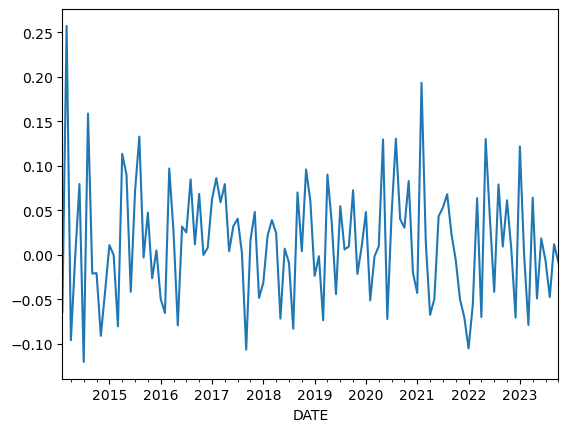

In [26]:
TMUS.plot() # visually it seems to be stationary

In [ ]:
# Augmented Dickey-Fuller (ADF) Test for stationary

In [49]:
datatest = adfuller(data['TMUS'], autolag = 'AIC')
print('1. ADF :', datatest[0] )
print('2. p-value :', datatest[1]) # == 0.000 so stationary
print('3. num of lags :', datatest[2])
print('4. num of obs :', datatest[3])
print('5. critical values :', datatest[4])
for key, val in datatest[4].items():
    print("\t", key, ': ', val)

1. ADF : -5.52996202134677
2. p-value : 1.7968323402763268e-06
3. num of lags : 2
4. num of obs : 114
5. critical values : {'1%': -3.489057523907491, '5%': -2.887246327182993, '10%': -2.5804808802708528}
	 1% :  -3.489057523907491
	 5% :  -2.887246327182993
	 10% :  -2.5804808802708528


In [ ]:
# since the stationary criterion is statisfied
# I plot pacf and acf to check for AR and MA, respectively, 

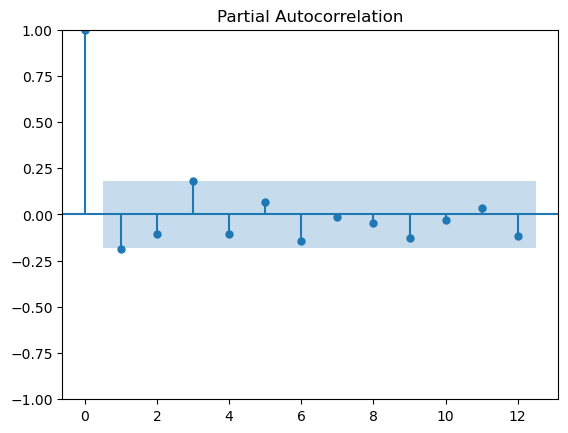

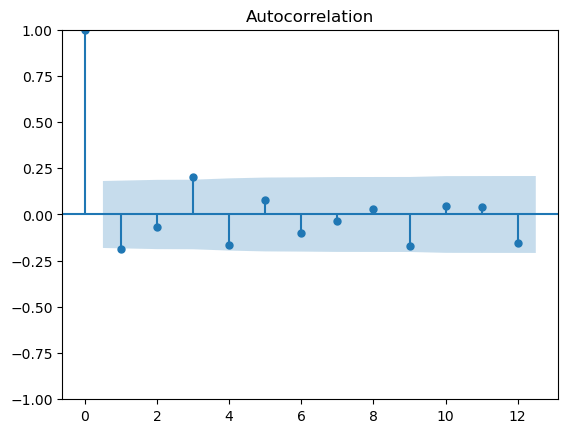

In [161]:
pacf = plot_pacf(TMUS, lags = 12, method='ywm') # direct effects
acf = plot_acf(TMUS, lags = 12) # both direct and indirect

In [ ]:
# I check seasonality by Locally Weighted Scatterplot Smoothing (LOESS)
# since there seem to be quite clear seasonality

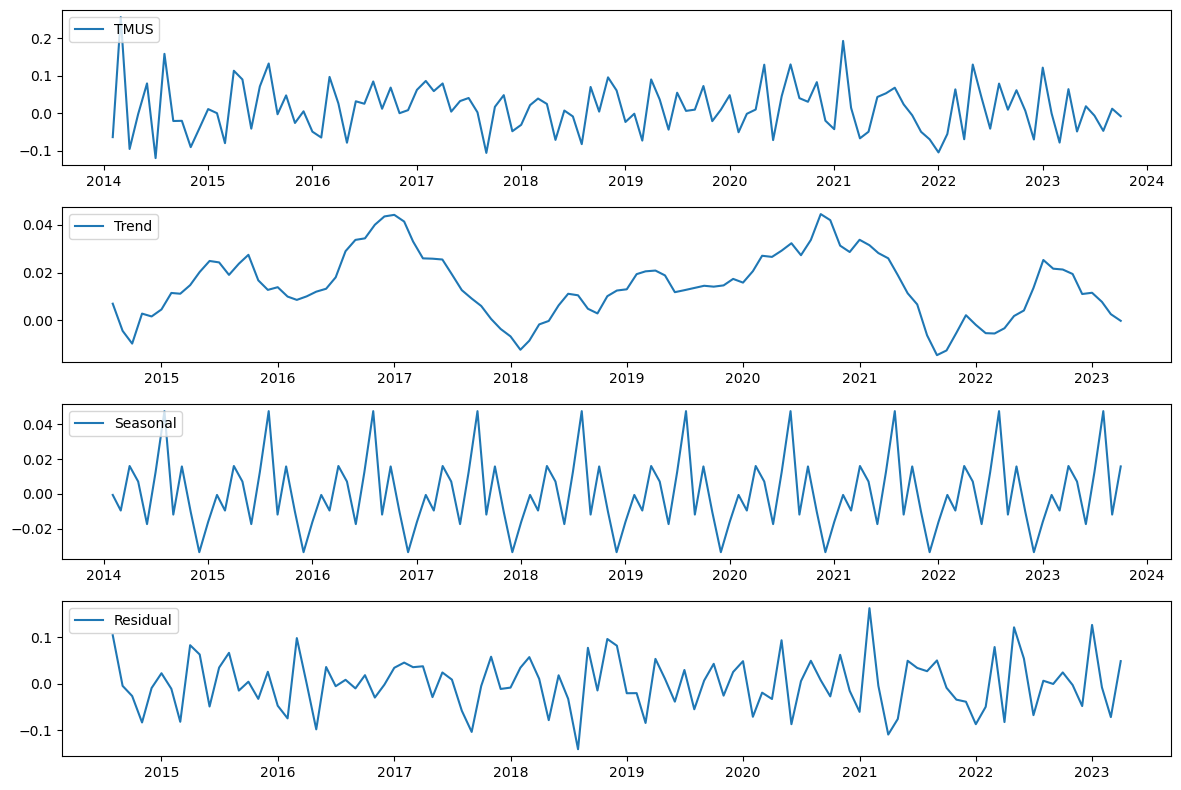

In [162]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

def stl_analysis(TMUS):
    # Perform STL decomposition
    decomposition = sm.tsa.seasonal_decompose(TMUS, model='additive')

    # Plot the decomposed components
    plt.figure(figsize=(12, 8))
    plt.subplot(411)
    plt.plot(TMUS, label='TMUS')
    plt.legend(loc='upper left')
    plt.subplot(412)
    plt.plot(decomposition.trend, label='Trend')
    plt.legend(loc='upper left')
    plt.subplot(413)
    plt.plot(decomposition.seasonal, label='Seasonal')
    plt.legend(loc='upper left')
    plt.subplot(414)
    plt.plot(decomposition.resid, label='Residual')
    plt.legend(loc='upper left')
    plt.tight_layout()

    plt.show()

# Call the function with your DataFrame
stl_analysis(TMUS)

In [80]:
TMUS.head()

DATE
2014-02-01   -0.064034
2014-03-01    0.257235
2014-04-01   -0.095697
2014-05-01   -0.002292
2014-06-01    0.079690
Name: TMUS, dtype: float64

In [ ]:
# TMUS log returns seem to have seasonality on a yearly basis,
# with spikes during summer (middle of the year), 
# and sharp decrease at the end of the year

In [169]:
from pmdarima import auto_arima

stepwise_model = auto_arima(TMUS, 
                            start_p=0, start_q=0, max_p=3, max_q=3,
                            seasonal=True, m=12,
                            trace=True,  # To see progress
                            error_action='ignore', 
                            suppress_warnings=True, 
                            stepwise=True)  # To make it faster

print(stepwise_model.aic())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=-298.619, Time=0.32 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=-298.845, Time=0.11 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=-301.929, Time=0.22 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=-302.466, Time=0.24 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=-295.956, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=-301.491, Time=0.15 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=-300.905, Time=0.42 sec
 ARIMA(0,0,1)(0,0,2)[12] intercept   : AIC=-300.536, Time=0.48 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=-302.391, Time=0.23 sec
 ARIMA(0,0,1)(1,0,2)[12] intercept   : AIC=inf, Time=0.68 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=-300.426, Time=0.09 sec
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=-300.489, Time=0.25 sec
 ARIMA(0,0,2)(0,0,1)[12] intercept   : AIC=-300.542, Time=0.17 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=-302.008, Time=0.13 sec
 ARIMA(1,0,2)(0,0,1)[12]

In [52]:
# the best result is ARIMA(2,0,2)(0,0,0)[12] intercept 

In [53]:
# Next, I try to split data into training and testing (80-20)

In [62]:
print(TMUS.shape)

(117,)


In [213]:
117 * 0.2

23.400000000000002

In [144]:
train = TMUS.iloc[:-23]
test = TMUS.iloc [-23:]
print(train.shape, test.shape)

(94,) (23,)


In [69]:
# Next, I try to make predictions on the test set

In [175]:
import statsmodels.api as sm

model = sm.tsa.statespace.SARIMAX(TMUS,
                                  order=(2, 0, 2),
                                  seasonal_order=(0, 0, 0, 12),
                                  enforce_stationarity=True,
                                  enforce_invertibility=True)

res = model.fit(disp=False)
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                   TMUS   No. Observations:                  117
Model:               SARIMAX(2, 0, 2)   Log Likelihood                 155.429
Date:                Tue, 24 Oct 2023   AIC                           -300.857
Time:                        17:51:26   BIC                           -287.046
Sample:                    02-01-2014   HQIC                          -295.250
                         - 10-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3901      0.131    -10.617      0.000      -1.647      -1.133
ar.L2         -0.8260      0.099     -8.308      0.000      -1.021      -0.631
ma.L1          1.3207      0.178      7.406      0.0

In [234]:
data_insample = data['2014-02-01':'2021-12-01']
data_insample.tail()

,TMUS
DATE,
2021-08-01,0.068160
2021-09-01,0.023614
2021-10-01,-0.005608
2021-11-01,-0.049825
2021-12-01,-0.069973


In [241]:
model = smt.ARIMA(data_insample, order=(2, 0, 2),
                                  seasonal_order=(0, 0, 0, 12))
res = model.fit()
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                   TMUS   No. Observations:                   95
Model:                 ARIMA(2, 0, 2)   Log Likelihood                 127.050
Date:                Wed, 25 Oct 2023   AIC                           -242.099
Time:                        13:02:28   BIC                           -226.776
Sample:                    02-01-2014   HQIC                          -235.908
                         - 12-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0163      0.006      2.866      0.004       0.005       0.027
ar.L1         -1.0249      0.356     -2.875      0.004      -1.724      -0.326
ar.L2         -0.4485      0.291     -1.543      0.1

In [264]:
data_insample = data['2014-02-01':'2021-12-01']
data_insample.tail()
data_outsample = data['2022-02-01':'2023-10-01']
data_outsample.head()

,TMUS
DATE,
2022-02-01,-0.055590
2022-03-01,0.063815
2022-04-01,-0.069714
2022-05-01,0.130186
2022-06-01,0.040871


In [246]:
model = smt.ARIMA(data, order=(2,0,2),
                 seasonal_order=(0, 0, 0, 12))
res = model.fit()
res.predict('2022-01-01','2023-10-01',dynamic=False)

2022-01-01    0.025572
2022-02-01    0.025878
2022-03-01    0.026090
2022-04-01    0.002029
2022-05-01    0.018591
2022-06-01    0.021860
2022-07-01   -0.028717
2022-08-01    0.062296
2022-09-01   -0.016705
2022-10-01    0.009479
2022-11-01    0.033209
2022-12-01   -0.018379
2023-01-01    0.053534
2023-02-01   -0.009382
2023-03-01   -0.003444
2023-04-01    0.061958
2023-05-01   -0.020947
2023-06-01    0.024432
2023-07-01    0.034580
2023-08-01   -0.017674
2023-09-01    0.052407
2023-10-01   -0.002390
Freq: MS, Name: predicted_mean, dtype: float64

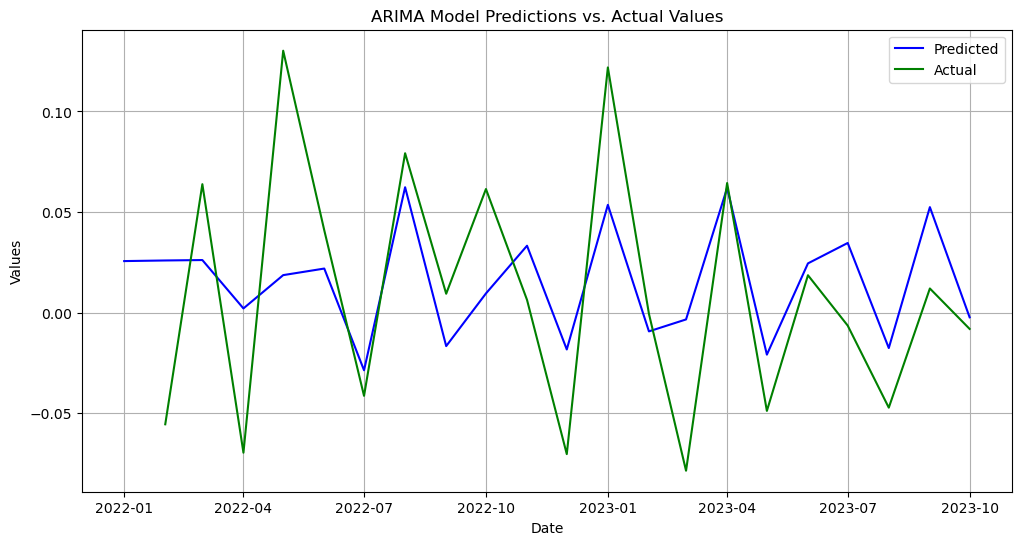

In [257]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'res.predict()' contains your predicted values and 'data_outsample' contains actual values
predicted_values = res.predict('2022-01-01', '2023-10-01', dynamic=False)

# Select the 'TMUS' column from 'data_outsample' for actual values
actual_data = data_outsample['TMUS']

# Create a date range for the predicted values
date_range = pd.date_range(start='2022-01-01', end='2023-10-01', freq='MS')

# Create a DataFrame with the predicted and actual values and date index
predicted_df = pd.DataFrame({'Predicted': predicted_values, 'Actual': actual_data}, index=date_range)

# Plot both predicted and actual values
plt.figure(figsize=(12, 6))
plt.plot(predicted_df.index, predicted_df['Predicted'], label='Predicted', color='blue')
plt.plot(predicted_df.index, predicted_df['Actual'], label='Actual', color='green')
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('ARIMA Model Predictions vs. Actual Values')
plt.legend()
plt.grid(True)
plt.show()

In [258]:
model = smt.ARIMA(data, order=(2,0,2),
                 seasonal_order=(0, 0, 0, 12))
res = model.fit()
res.predict('2022-01-01','2023-10-01',dynamic=True)

2022-01-01    0.025572
2022-02-01    0.012470
2022-03-01    0.006043
2022-04-01    0.025487
2022-05-01    0.004139
2022-06-01    0.017499
2022-07-01    0.016607
2022-08-01    0.006956
2022-09-01    0.020873
2022-10-01    0.009703
2022-11-01    0.013648
2022-12-01    0.017344
2023-01-01    0.009082
2023-02-01    0.017368
2023-03-01    0.012765
2023-04-01    0.012315
2023-05-01    0.016675
2023-06-01    0.011081
2023-07-01    0.015180
2023-08-01    0.014129
2023-09-01    0.012231
2023-10-01    0.015680
Freq: MS, Name: predicted_mean, dtype: float64

In [216]:
# Define the start and end points for the prediction
start = len(train)
end = len(train) + len(test) - 1

# Generate predictions using the SARIMAX model
# Static Prediction for Holt-Winters
pred_static_hw = res.forecast(steps=len(test))

# Print the predictions
print(pred_static_hw)

2022-01-01    0.016088
2022-02-01    0.016088
2022-03-01    0.016088
2022-04-01    0.016088
2022-05-01    0.016088
2022-06-01    0.016088
2022-07-01    0.016088
2022-08-01    0.016088
2022-09-01    0.016088
2022-10-01    0.016088
2022-11-01    0.016088
2022-12-01    0.016088
2023-01-01    0.016088
2023-02-01    0.016088
2023-03-01    0.016088
2023-04-01    0.016088
2023-05-01    0.016088
2023-06-01    0.016088
2023-07-01    0.016088
2023-08-01    0.016088
2023-09-01    0.016088
2023-10-01    0.016088
2023-11-01    0.016088
Freq: MS, dtype: float64


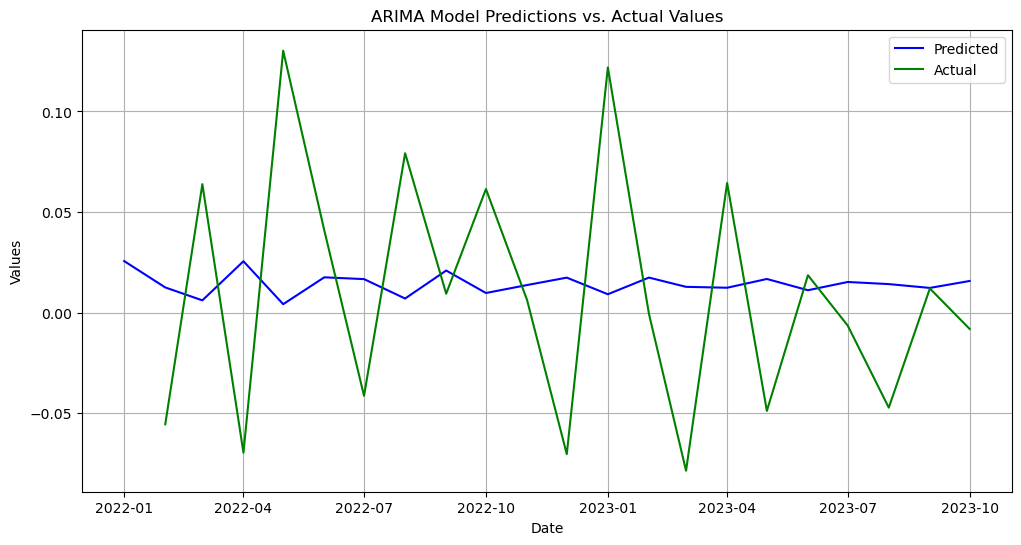

In [260]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'res.predict()' contains your predicted values and 'data_outsample' contains actual values
predicted_values = res.predict('2022-01-01', '2023-10-01', dynamic=True)

# Select the 'TMUS' column from 'data_outsample' for actual values
actual_data = data_outsample['TMUS']

# Create a date range for the predicted values
date_range = pd.date_range(start='2022-01-01', end='2023-10-01', freq='MS')

# Create a DataFrame with the predicted and actual values and date index
predicted_df = pd.DataFrame({'Predicted': predicted_values, 'Actual': actual_data}, index=date_range)

# Plot both predicted and actual values
plt.figure(figsize=(12, 6))
plt.plot(predicted_df.index, predicted_df['Predicted'], label='Predicted', color='blue')
plt.plot(predicted_df.index, predicted_df['Actual'], label='Actual', color='green')
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('ARIMA Model Predictions vs. Actual Values')
plt.legend()
plt.grid(True)
plt.show()

In [267]:
def rmse(pred, target):
    return np.sqrt(((pred - target) ** 2).mean())
data_insample = data['2014-02-01':'2021-12-31']
pred = res.predict('2014-02-01','2021-12-31',dynamic=False)
stats = rmse(pred, data_insample['TMUS'])
print('Root Mean Squared Error (rmse function): {}'.format(stats))

data_outsample = data['2022-01-01':'2023-10-01']
pred = res.predict('2022-01-01','2023-10-01',dynamic=False)
stats1 = rmse(pred, data_outsample['TMUS'])
print('Root Mean Squared Error (rmse function): {}'.format(stats1))

from sklearn.metrics import mean_squared_error
stats2 = np.sqrt(mean_squared_error(data_outsample['TMUS'], pred))
print('Root Mean Squared Error (sklearn): {}'.format(stats2))

Root Mean Squared Error (rmse function): 0.06655255769699465
Root Mean Squared Error (rmse function): 0.06601579430338547
Root Mean Squared Error (sklearn): 0.06601579430338547


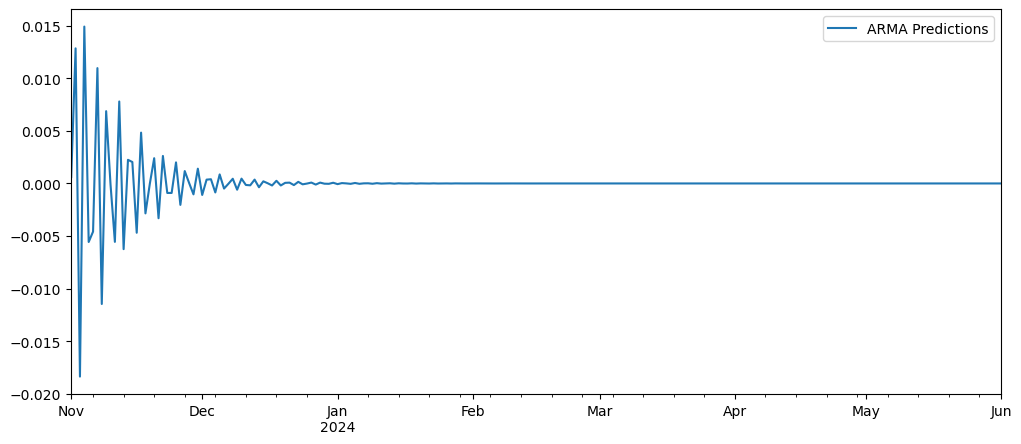

In [185]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt


# Generate future dates for forecasting
index_future_dates = pd.date_range(start='2023-11-01', end='2024-06-01')

# Perform the ARMA forecast
pred = res.predict(start=len(TMUS), end=len(TMUS) + len(index_future_dates) - 1, typ='levels')

# Rename the Series to 'ARMA Predictions'
pred = pred.rename('ARMA Predictions')

# Set the index to the future dates
pred.index = index_future_dates

# Plot the forecasted data
pred.plot(figsize=(12, 5), legend=True)
plt.show()

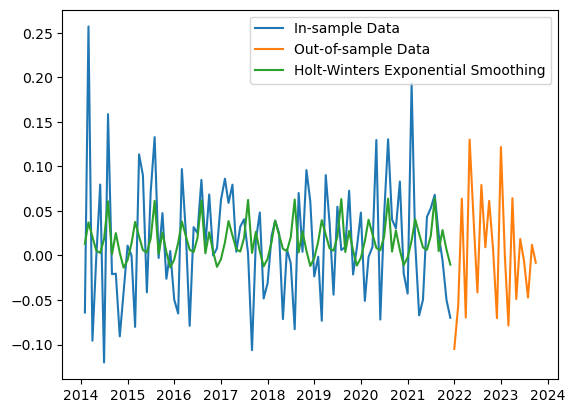

In [288]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt

# Define the Exponential Smoothing model with the appropriate settings
model_hw = ExponentialSmoothing(data_insample, trend='add', seasonal='add', seasonal_periods=12)

# Fit the model to the data
res_hw = model_hw.fit()

# Generate predictions starting from a specific date
pred_hw = res_hw.predict(start="2014-02-01")

# Create a plot to visualize the results
plt.figure()
plt.plot(data_insample, label='In-sample Data')
plt.plot(data_outsample, label='Out-of-sample Data')
plt.plot(pred_hw, label='Holt-Winters Exponential Smoothing')
plt.legend()
plt.show()

In [289]:
# Calculate RMSE
from sklearn.metrics import mean_squared_error
import numpy as np

rmse_hw = np.sqrt(mean_squared_error(pred_hw, data_insample))
print('Root Mean Squared Error for Holt-Winters: {:.4f}'.format(rmse_hw))

# Optimal smoothing coefficient for Holt-Winters
smoothing_level = res_hw.params['smoothing_level']
print('Optimal smoothing coefficient for Holt-Winters: {:.4f}'.format(smoothing_level))

# Sum-of-squared residuals for Holt-Winters
sse_hw = res_hw.sse
print('Sum-of-squared residuals for Holt-Winters: {:.4f}'.format(sse_hw))

Root Mean Squared Error for Holt-Winters: 0.0638
Optimal smoothing coefficient for Holt-Winters: 0.0000
Sum-of-squared residuals for Holt-Winters: 0.3871


In [301]:
import statsmodels.api as sm
from scipy import stats

# 1. Define and fit the SARIMA model for insample data
insample_model = sm.tsa.statespace.SARIMAX(data_insample, 
                                          order=(2, 0, 2),
                                          seasonal_order=(0, 0, 1, 12),
                                          enforce_stationarity=True,
                                          enforce_invertibility=True)
res_insample = insample_model.fit(disp=False)

# Calculate the sum of squared residuals for the insample model
SSR_before = sum(res_insample.resid ** 2)

# 2. Regression on the full dataset
model_full = sm.tsa.statespace.SARIMAX(data,
                                      order=(2, 0, 2),
                                      seasonal_order=(0, 0, 1, 12),
                                      enforce_stationarity=True,
                                      enforce_invertibility=True)
res_full = model_full.fit(disp=False)

# Calculate the sum of squared residuals for the full dataset model
SSR_full = sum(res_full.resid ** 2)

# 3. Regression on data outsample
model_outsample = sm.tsa.statespace.SARIMAX(data_outsample,
                                            order=(2, 0, 2),
                                            seasonal_order=(0, 0, 1, 12),
                                            enforce_stationarity=True,
                                            enforce_invertibility=True)
res_outsample = model_outsample.fit(disp=False)

# Calculate the sum of squared residuals for the outsample model
SSR_after = sum(res_outsample.resid ** 2)

# 4. Compute the Chow test statistic
N = len(data)
m = len(res_insample.params)  # Number of parameters in the insample model

F_stat = ((SSR_full - (SSR_before + SSR_after)) / m) / ((SSR_before + SSR_after) / (N - 2 * m))

# 5. Get p-value
dfl = m
df2 = N - 2 * m
p_value = 1 - stats.f.cdf(F_stat, dfl, df2)

# Print the results
print(f"Chow Test Statistic: {F_stat}")
print(f'p-value: {p_value}')

Chow Test Statistic: 0.5233443514933386
p-value: 0.789483775602727


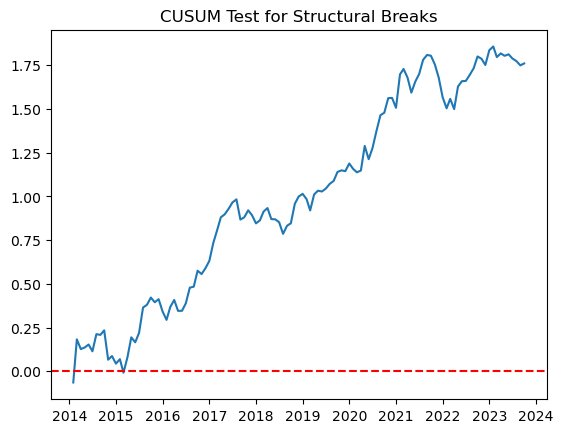

DATE
2014-02-01   -0.064034
2014-03-01    0.182786
2014-04-01    0.126948
2014-05-01    0.136061
2014-06-01    0.153120
                ...   
2023-06-01    1.813254
2023-07-01    1.789163
2023-08-01    1.774379
2023-09-01    1.749886
2023-10-01    1.760912
Length: 117, dtype: float64


In [299]:
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit the SARIMA model
model = SARIMAX(data, order=(2, 0, 2), seasonal_order=(0, 0, 0, 12))
results = model.fit()

# Get the residuals
residuals = results.resid
cusum = np.cumsum(residuals)
import matplotlib.pyplot as plt

plt.plot(cusum)
plt.axhline(0, color='red', linestyle='--')
plt.title("CUSUM Test for Structural Breaks")
plt.show()
print(cusum)

In [298]:
import statsmodels.stats as sms
import pandas as pd


# Define the names for the columns
names = ['test statistic', 'pval', 'crit']

test = sms.breaks_cusumolsresid(model.resid, ddof = model.df_model)


# Print the results for the "TMUS" SARIMA model
print("TMUS SARIMA Model CUSUM Parameter Stability Test Results:")
print(result_df)


AttributeError: module 'statsmodels.stats' has no attribute 'breaks_cusumolsresid'

In [287]:
def rmse(pred, target):
    return np.sqrt(((pred - target) ** 2).mean())
stats = rmse(pred,data_insample)
print('Optimal smoothing coefficient: {}'.format(res.params['smoothing_level']))
print('root mean squared error: {}'.format(stats) )
print('sum-of-squared residuals: {}'.format(res.sse) )

Optimal smoothing coefficient: 1.4901161193847656e-08
root mean squared error: 2014-02-01 00:00:00   NaN
2014-03-01 00:00:00   NaN
2014-04-01 00:00:00   NaN
2014-05-01 00:00:00   NaN
2014-06-01 00:00:00   NaN
                       ..
2021-09-01 00:00:00   NaN
2021-10-01 00:00:00   NaN
2021-11-01 00:00:00   NaN
2021-12-01 00:00:00   NaN
TMUS                  NaN
Length: 96, dtype: float64
sum-of-squared residuals: 0.42320310699394753


In [ ]:
#stability testing